# Step-by-step Tutorial on Implementing the Dijkastra Algorithm in Python

## Why learn the Dijkastra's algorithm

Dijkastra's is the go-to algorithm for finding the shortest path between two points in a network, which has many applications. It's fundamental in computer science and graph theory. Understanding and learning to implement it opens doors to more advanced graph algorithms and applications. 

It also teaches a valuable problem-solving approach through its greedy algorithm, which involves making the optimal choice at each step based on current information. This skill is transferable to other optimization algorithms. Dijkastra's algorithm may not be the most efficient in all scenarios but it can be a good baseline when solving "shortest distance" problems. Examples include:

- GPS navigation systems finding the fastest route
- Routing data packets in computer networks
- Delivery services optimizing routes for efficiency
- Social networks (suggesting connections)
- Finance (finding optimal investment paths)
- Project management (finding the most efficient workflow)

Even if you aren't interested in any of these things, implementing Dijkastra's algorithm in Python will let you practice important concepts such as:

- Python classes
- Dictionary and list comprehensions
- Priority queues
- The `networkx` library for graph manipulation
- Creating animations as GIFs

This will be a fun tutorial, so let's get started!

## Key concepts related to graphs

To implement Dijkastra's algorithm in Python, we need to refresh a few essential concepts from graph theory. First of all, we have __graphs__ themselves:

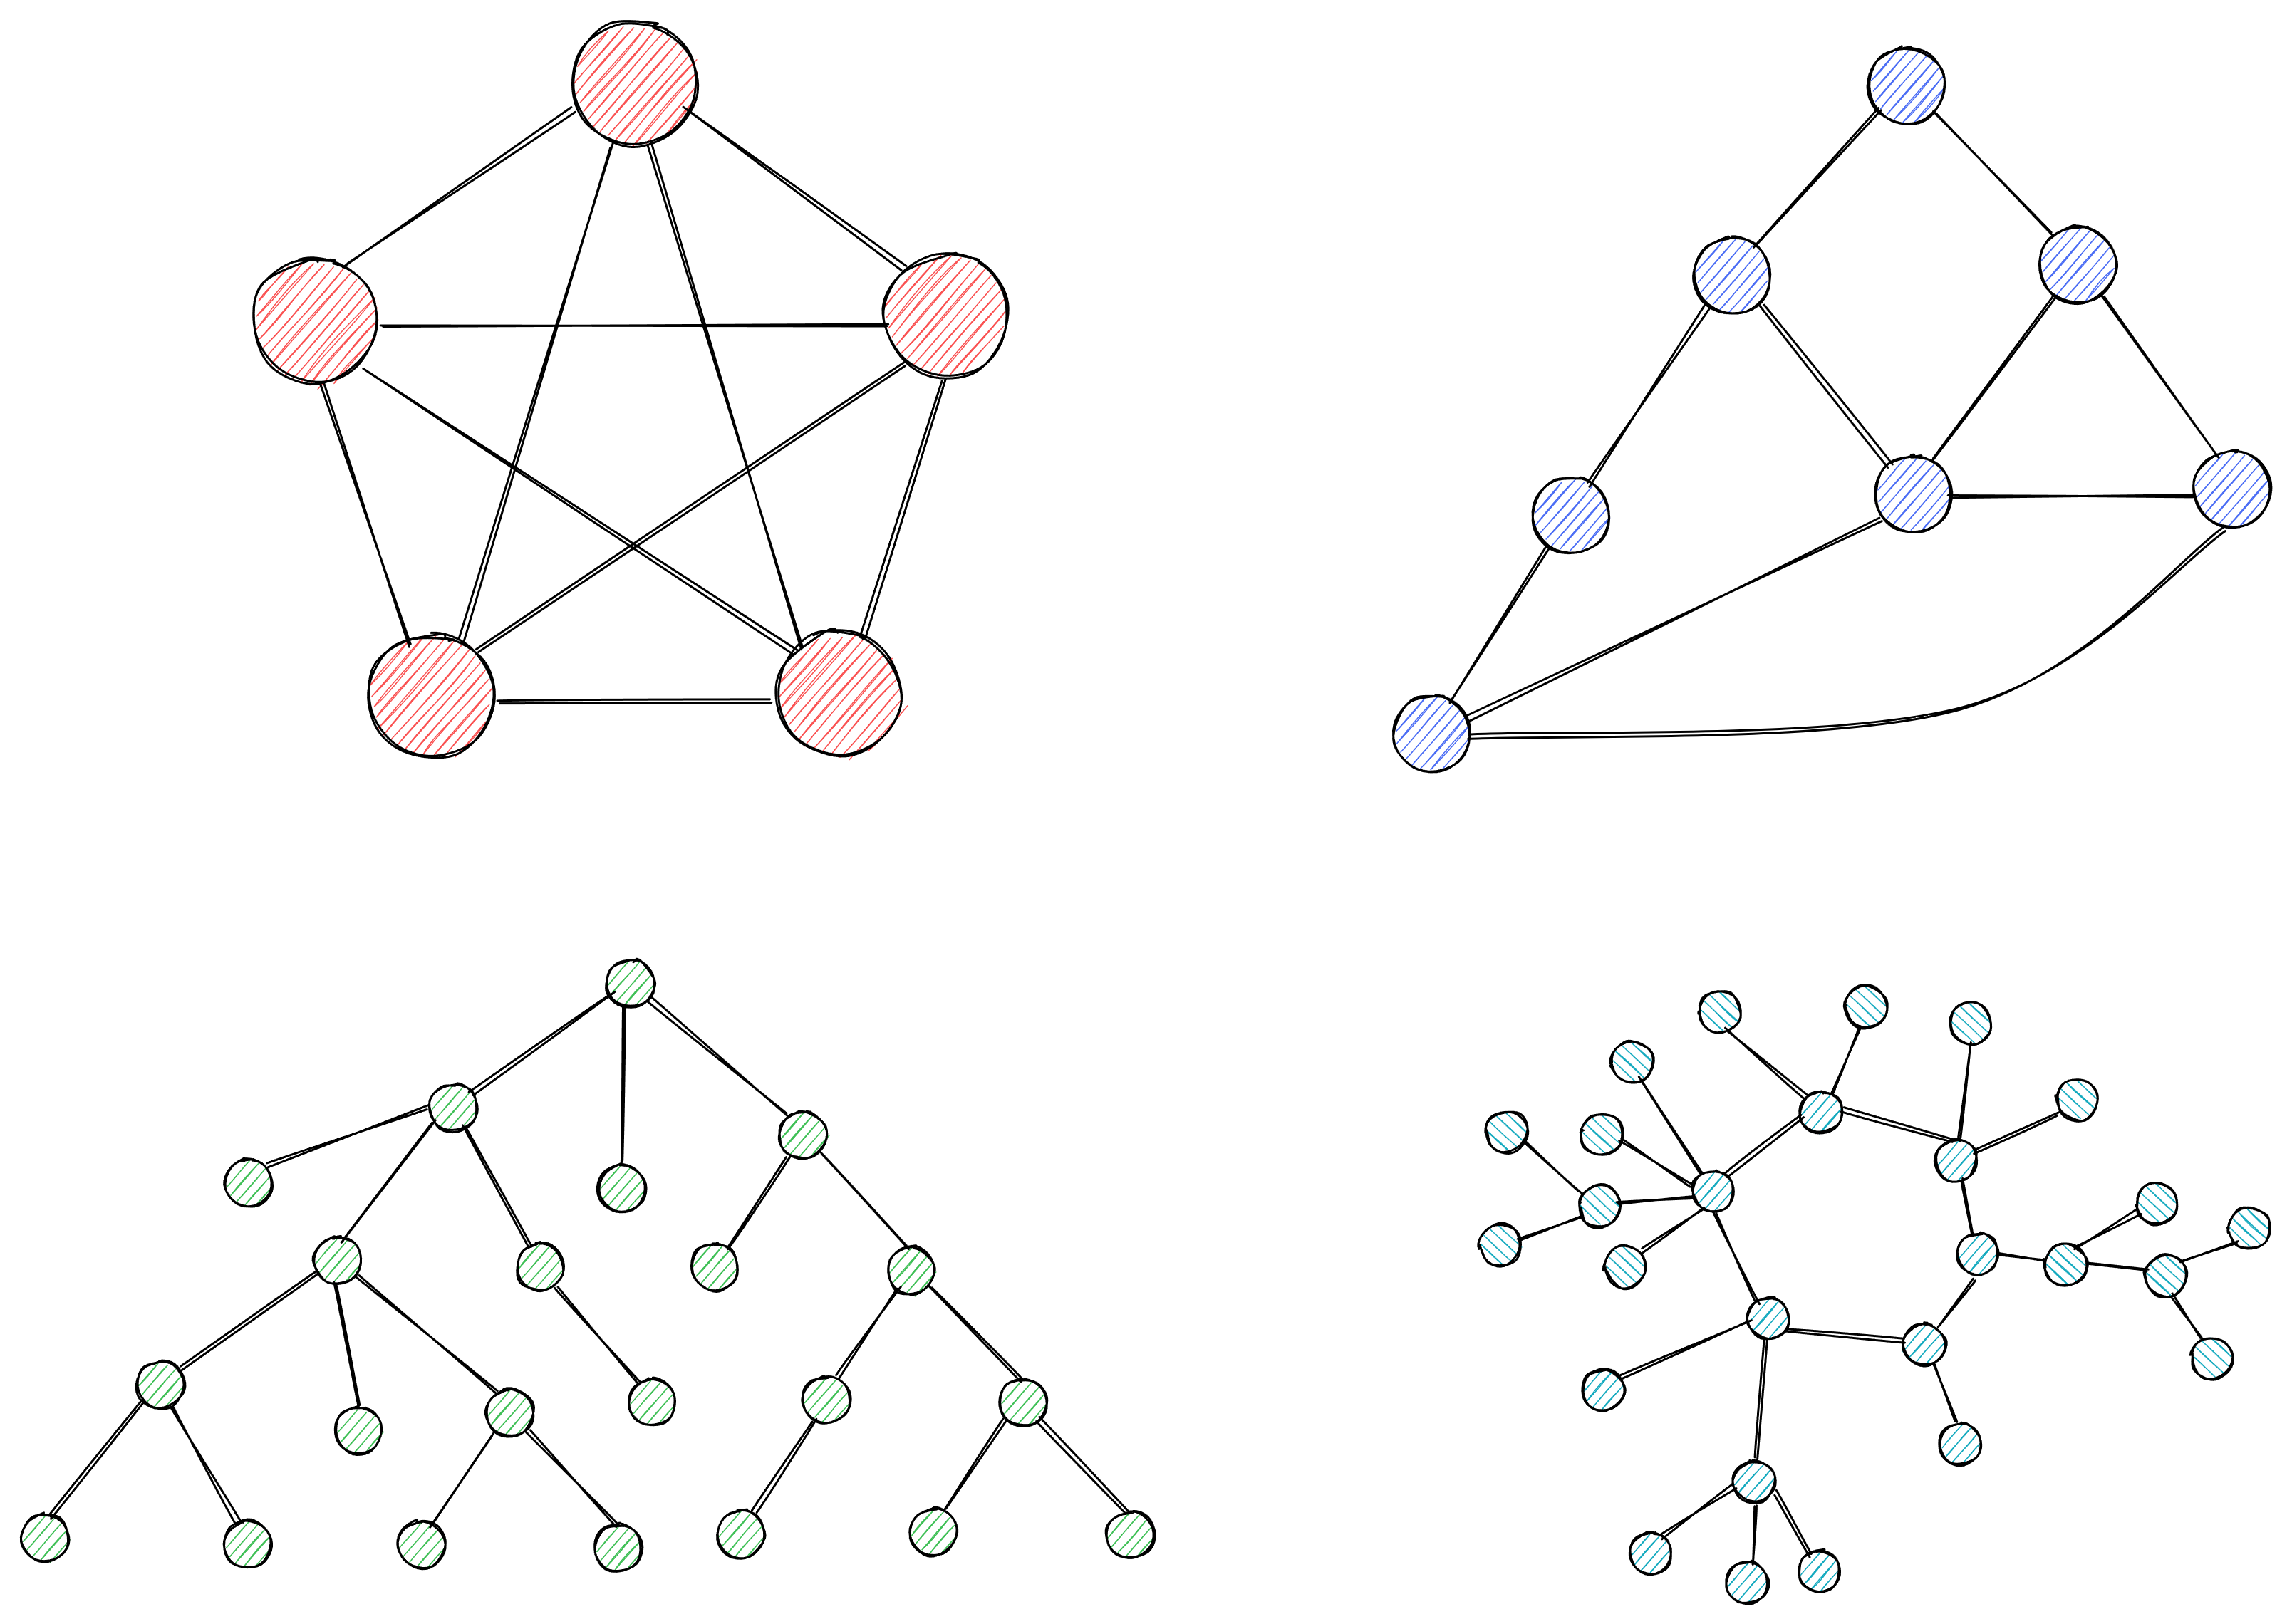

Graphs are collections of __nodes (vertices)__ connected by __edges__. Nodes represent entities or points in a network, while edges represent the connection or relationship between them.

Graphs can be weighted or unweighted. In unweighted graphs, all edges have the same weight (often set to 1). In weighted graphs, as you guessed it, each edge has a weight associated with it, often representing cost, distance, or time. We will be using weighted graphs in the tutorial as is the requirement for Dijkastra's algorithm.

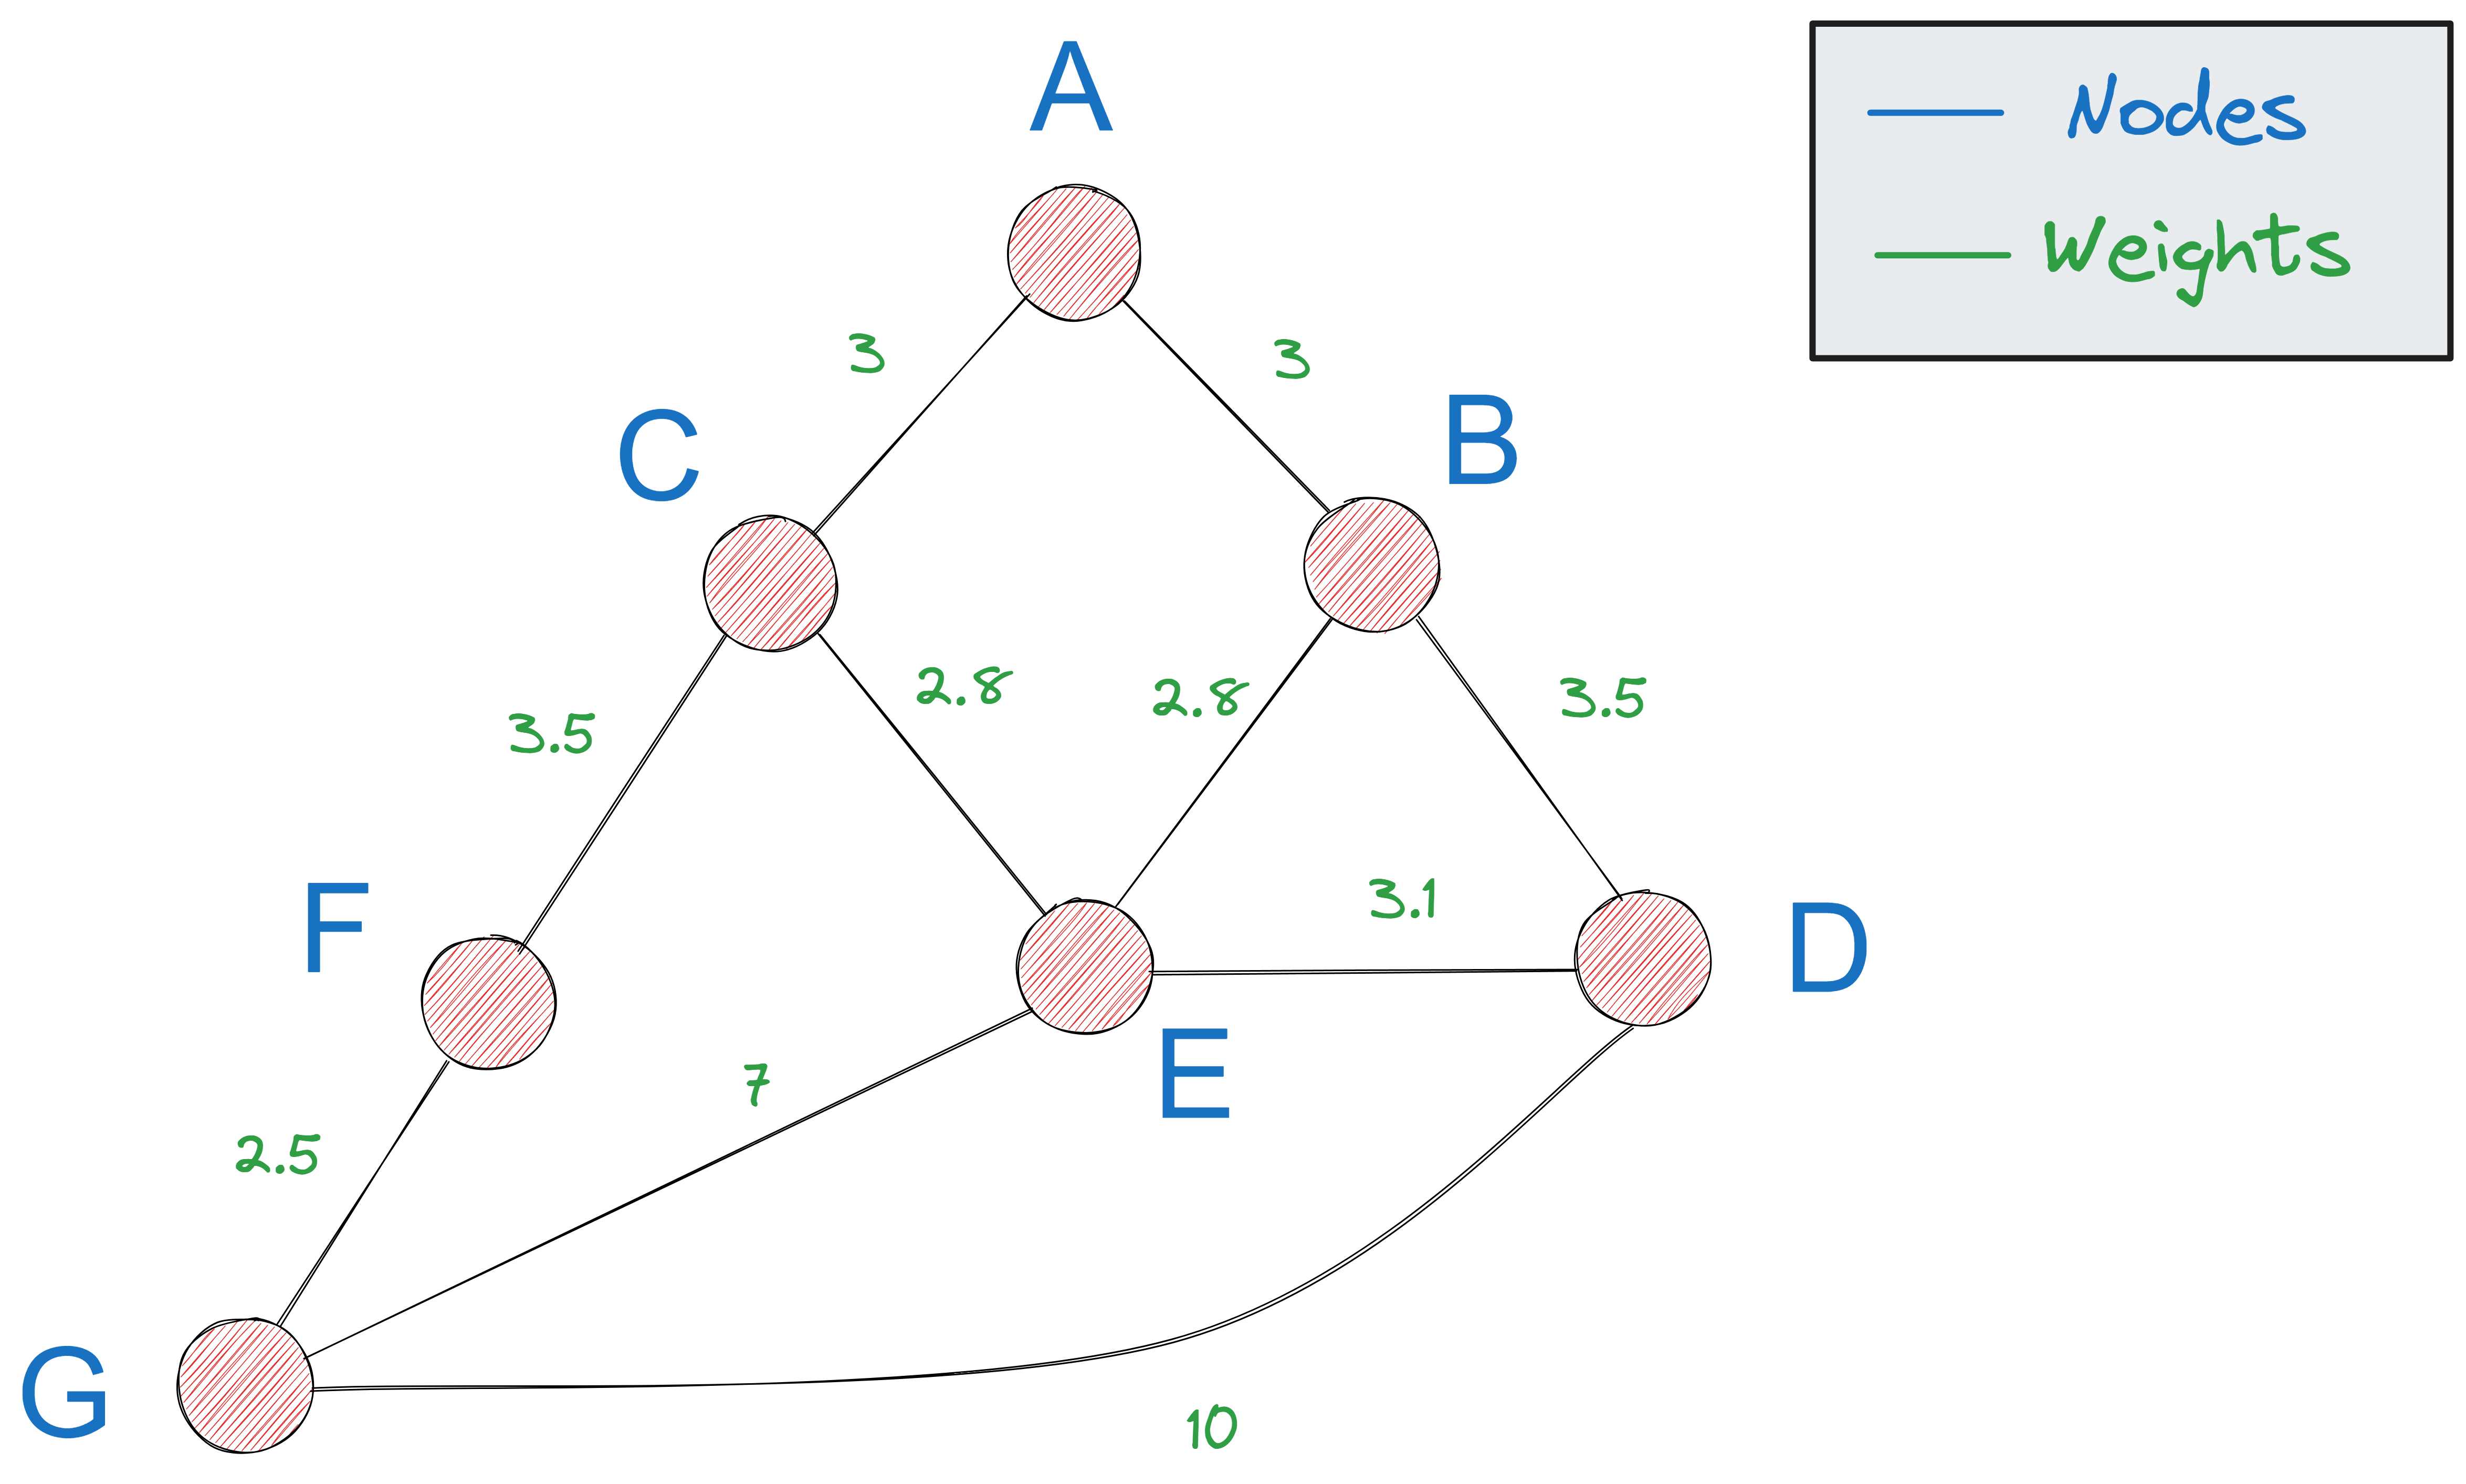

A path in a graph refers to a sequence of nodes connected by edges, starting and ending at specific nodes. The shortest path, what we care about in this tutorial, is the path with the minimum total weight (distance, cost, etc.). 

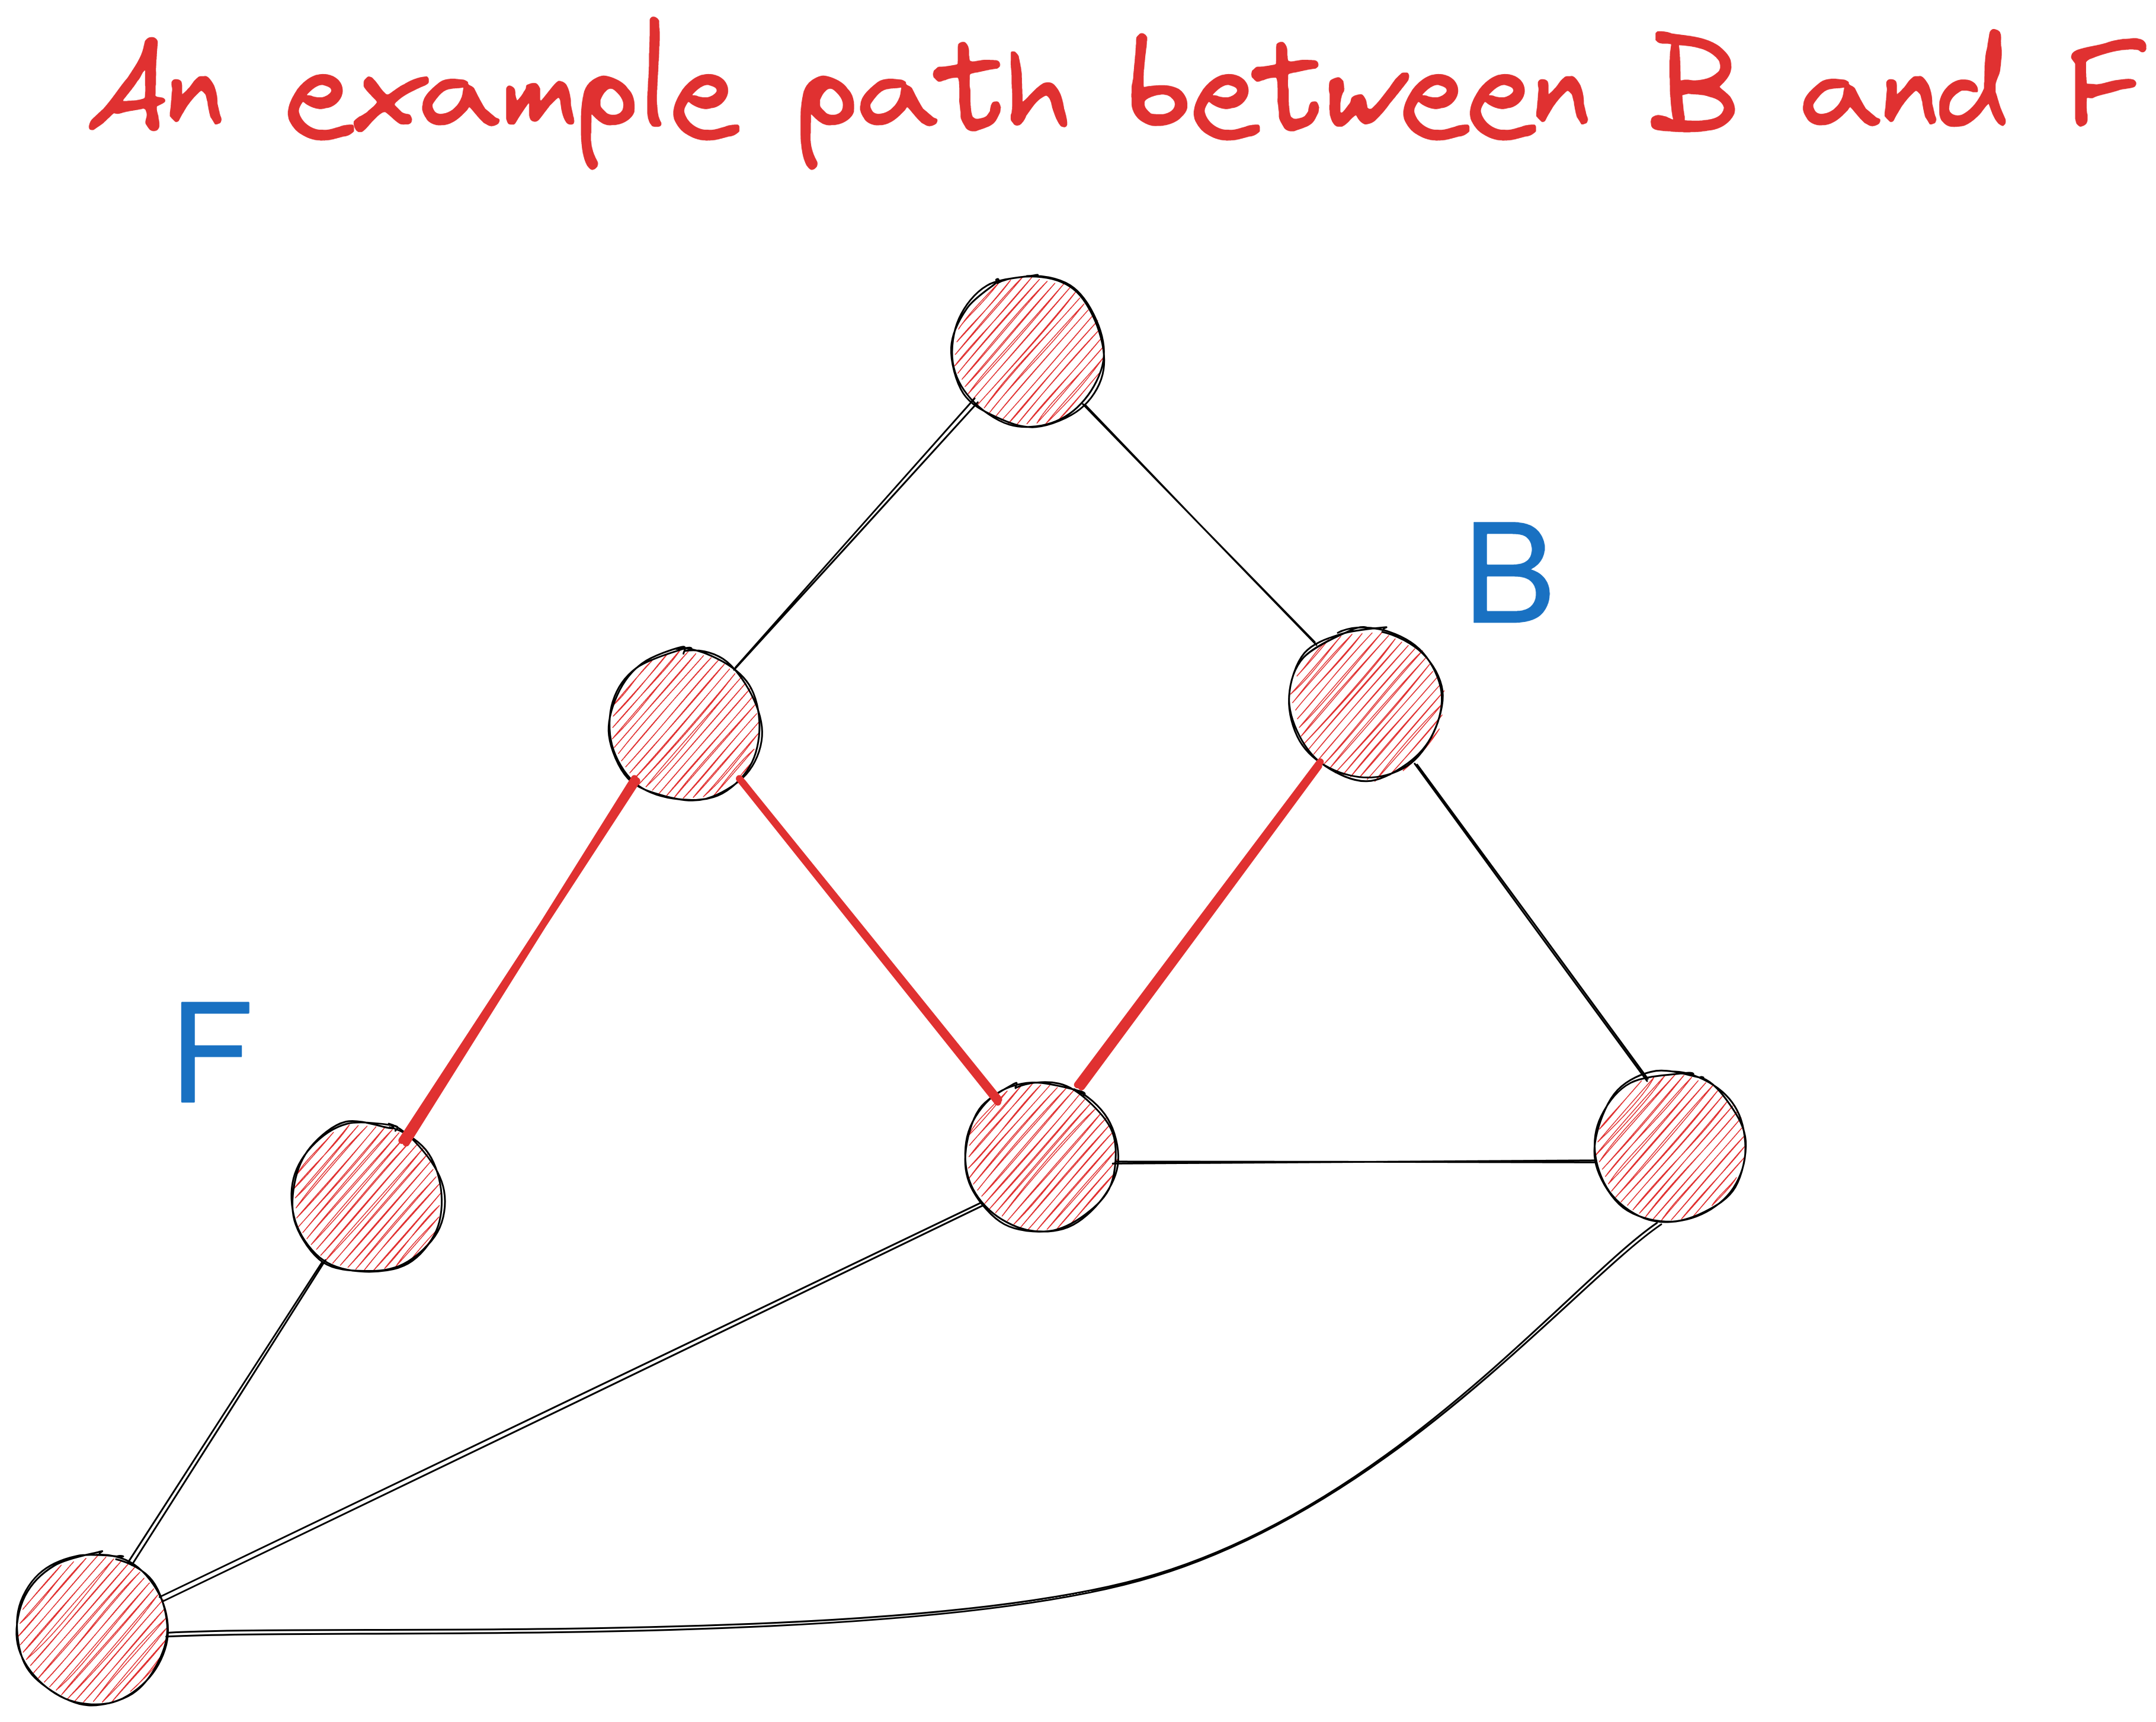

## The Dijkastra algorithm explained visually

For the rest of the tutorial, we will be using the last graph we saw:

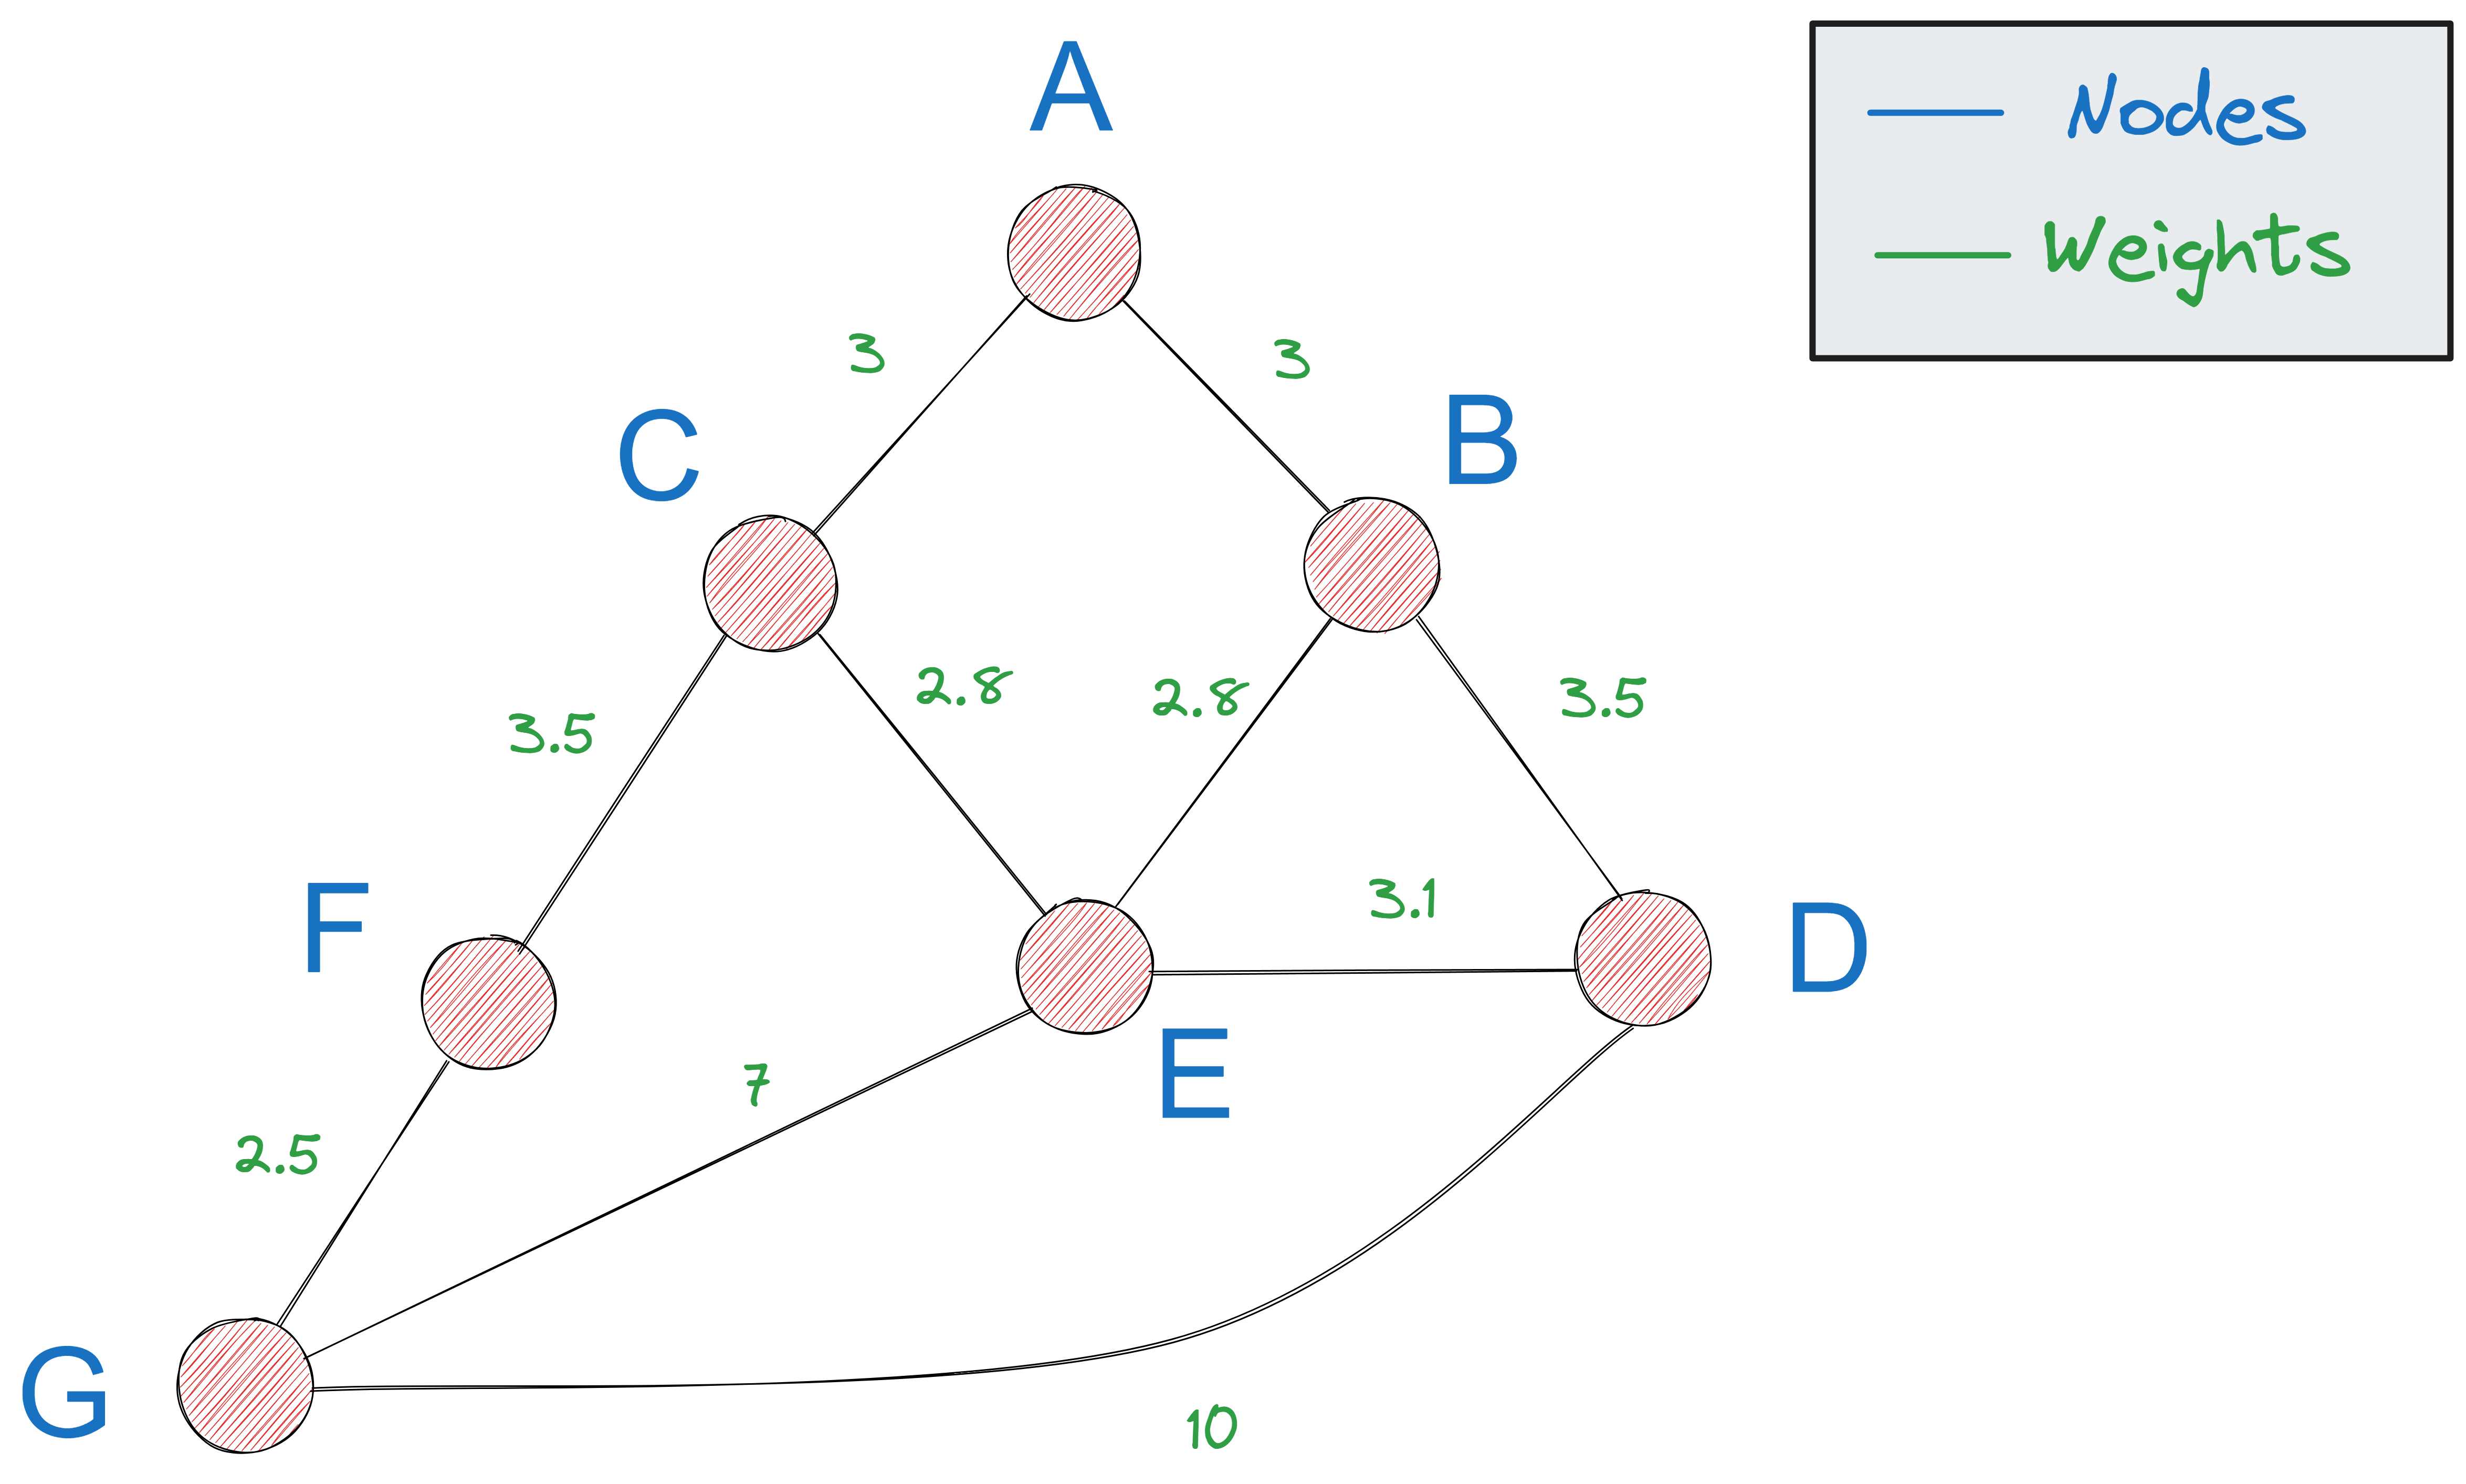

Let's try to find the shortest path between points B and F using Dijkastra's algorithm (I count at least seven possible paths). Initially, we will do the task visually and implement it in code later. 

First, we initialize the algorithm as follows:

1. We set B as the root (source) node.
2. We set the distances between B and all other nodes to infinity as their initial, tentative values. We set the value for B to 0 as it is the distance to itself:

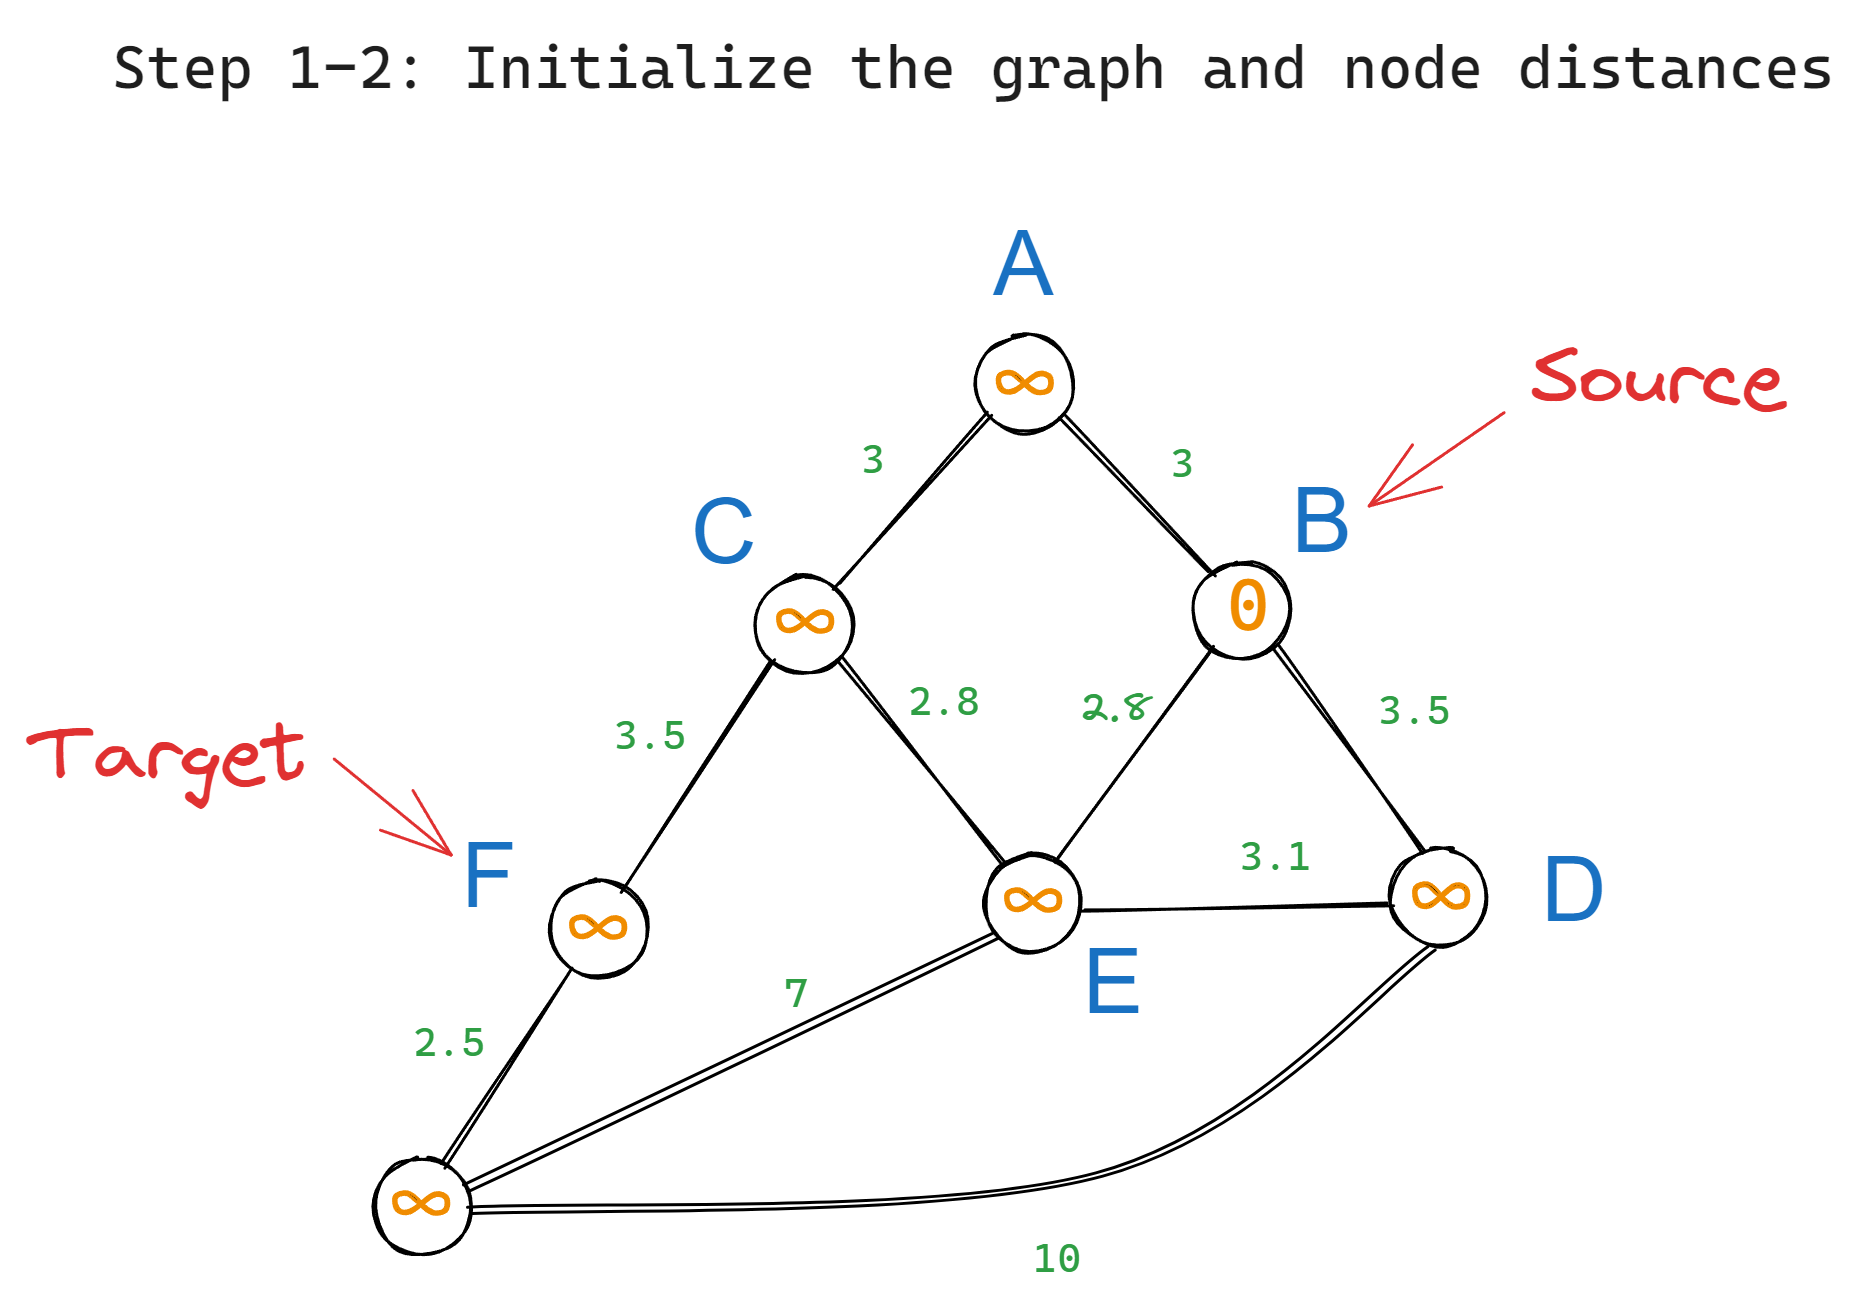

Then, we execute the following steps iteratively:

1. Choose the node with the smallest value as the "current node" and visit all its neighboring nodes. As we visit each neighbor, we update their tentative values from infinity to their edge weights starting from the source node.
2. After all neighbors of the current node are visited, we mark the current node as "visited". Once a node is marked "visited", its value is already the shortest path from the target.
3. The algorithm goes back to step 1 and chooses the node with the smallest value.

In our graph, B has three neighbors - A, D, E. Let's visit each one starting from the root node and update their values (iteration 1) based on their edge weights:

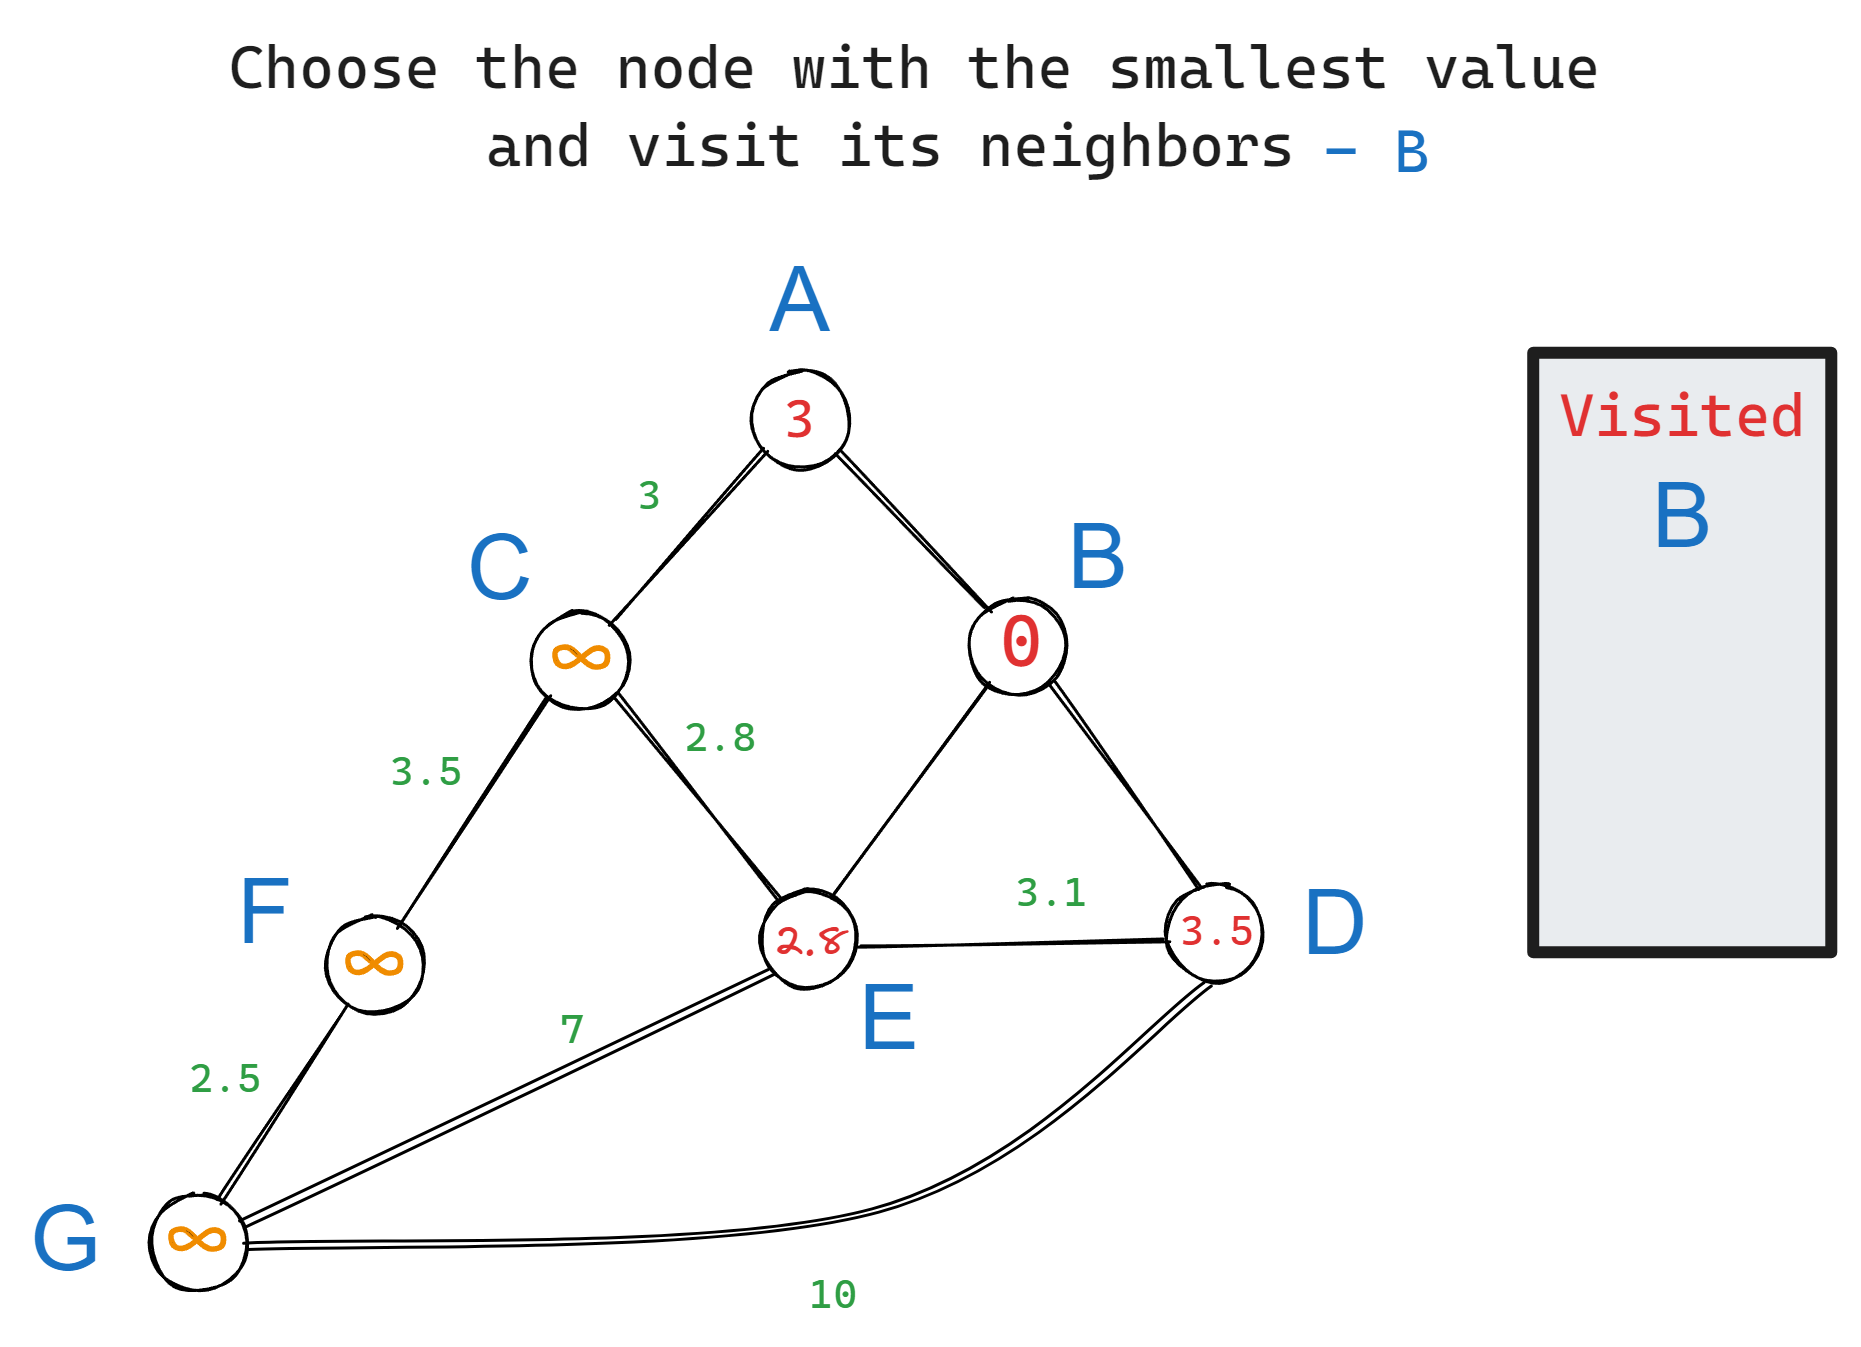

In iteration 2, we choose the node with the smallest value again, this time - E. Its neighbors are C, D and G. B is excluded because we've already visited it. Let's update their values:

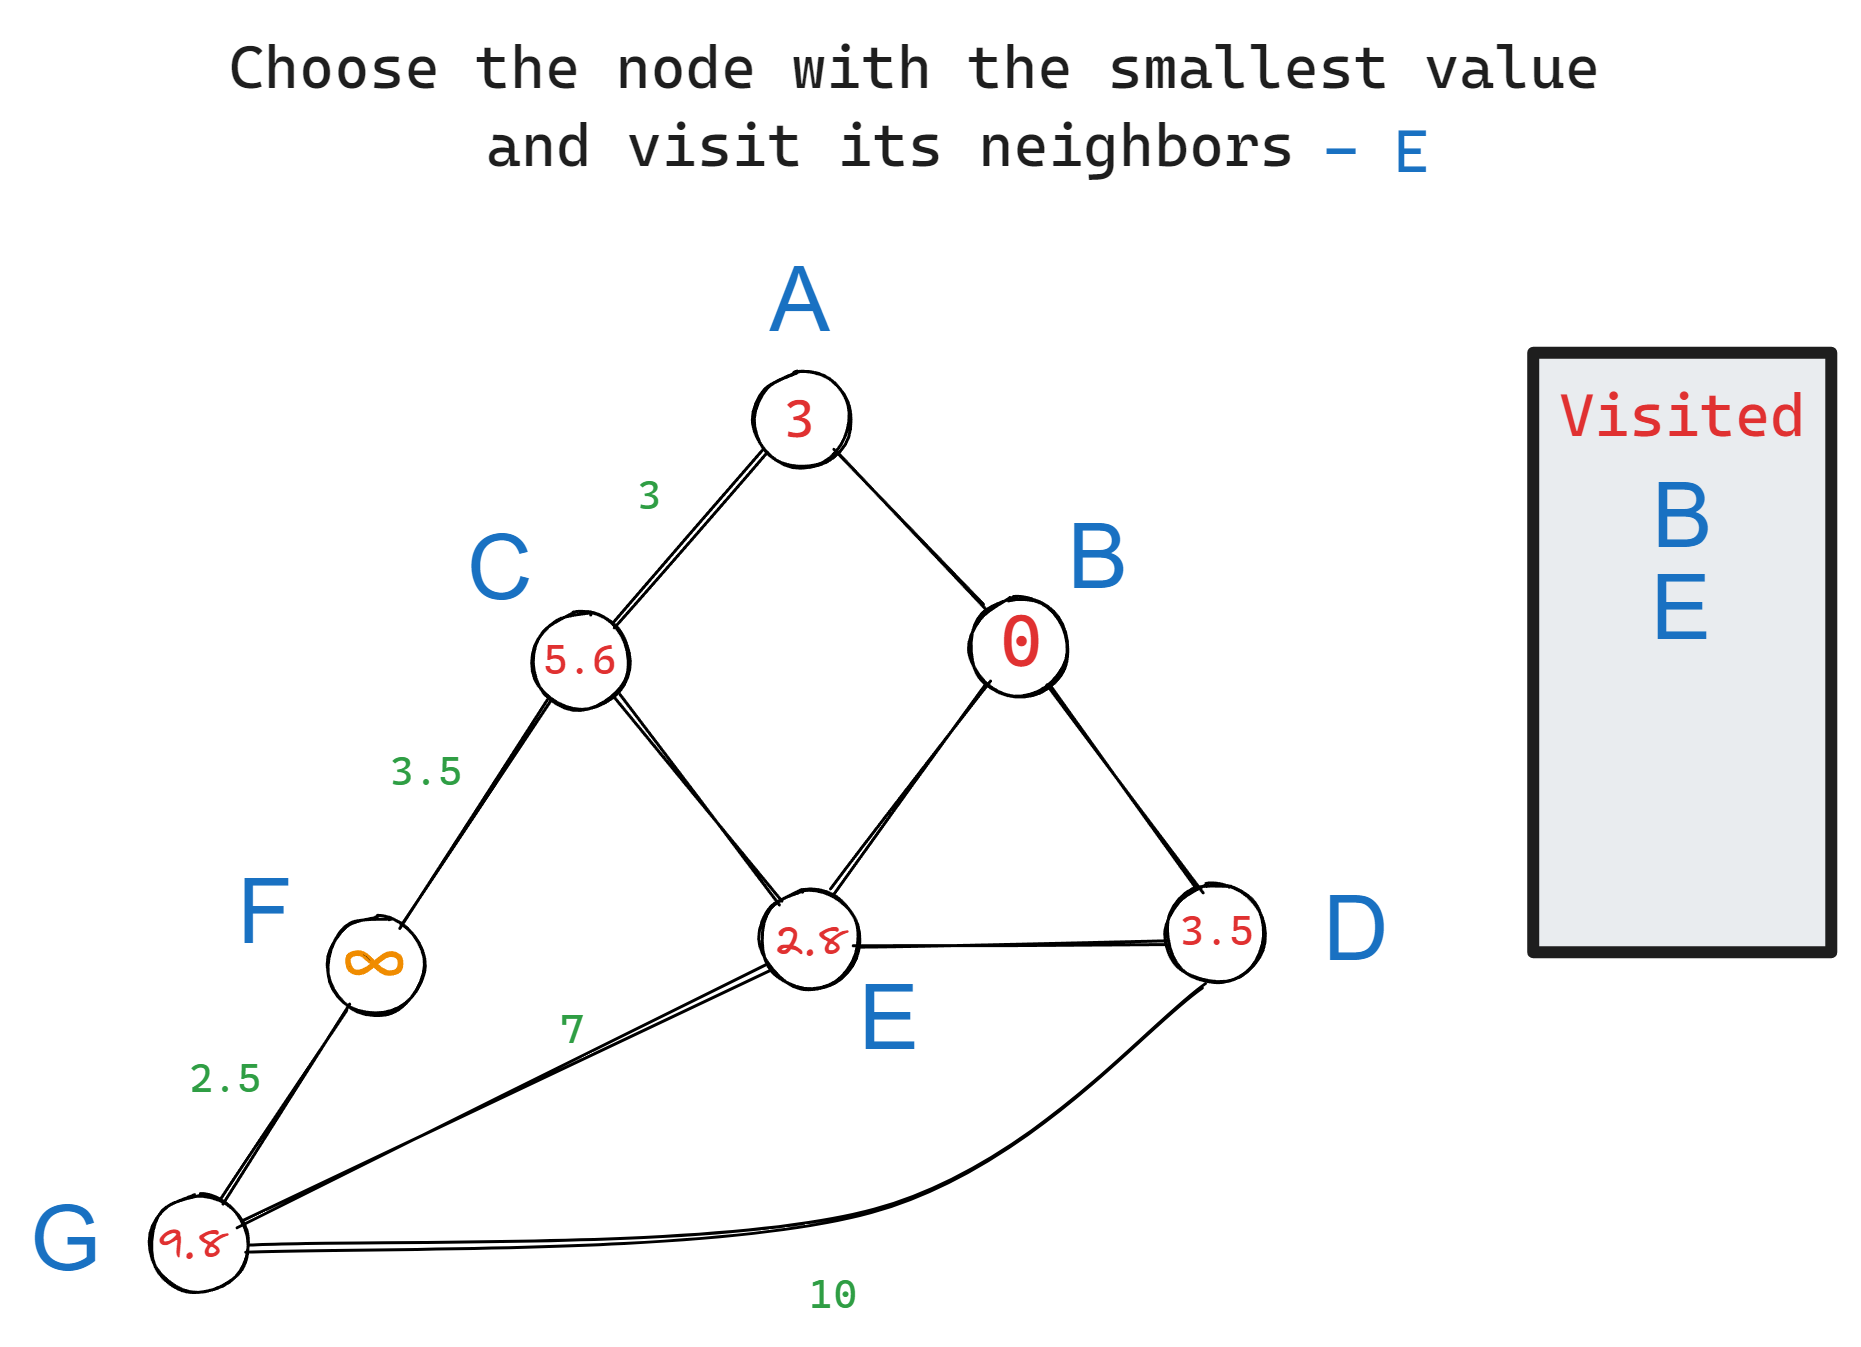

We set C's value to 5.6 because its value is the cumulative sum of weights from B to C. The same goes for G. However, if you notice, D's value remains 3.5 when it should have been 3.5 + 2.8 = 6.3 as with the other nodes. The rule is that if the new cumulative sum is larger than the node's current value, we won't update it because the node already lists the shortest distance to the root already. In this case, D's current value of 3.5 already notes the shortest distance to B because they are neighbors. 

We continue in this fashion until all nodes are visited. When that finally happens, we will have the shortest distance to each node from B and we can simply look up the value from B to F. 

In summary, the steps are:

1. Initialize the graph with the source node to take value of 0 and all other nodes infinity. Start with the source as the "current node".
2. Visit all neighboring nodes of the current node and update their values to the cumulative sum of weights (distances) from the source. If a neighbor's current value is smaller than the cumulative sum, its stays the same. Mark the "current node" as finished.
3. Mark the unfinished minimum-value node as the "current node".
4. Repeat steps 2 and 3 until all nodes are finished.

## Step-by-step implementation of the Dijkastra algorithm in Python

### 0. Understanding graphs as dictionaries

First, we need a way to represent graphs in code - the most popular option is using a dictionary. If this is our graph:

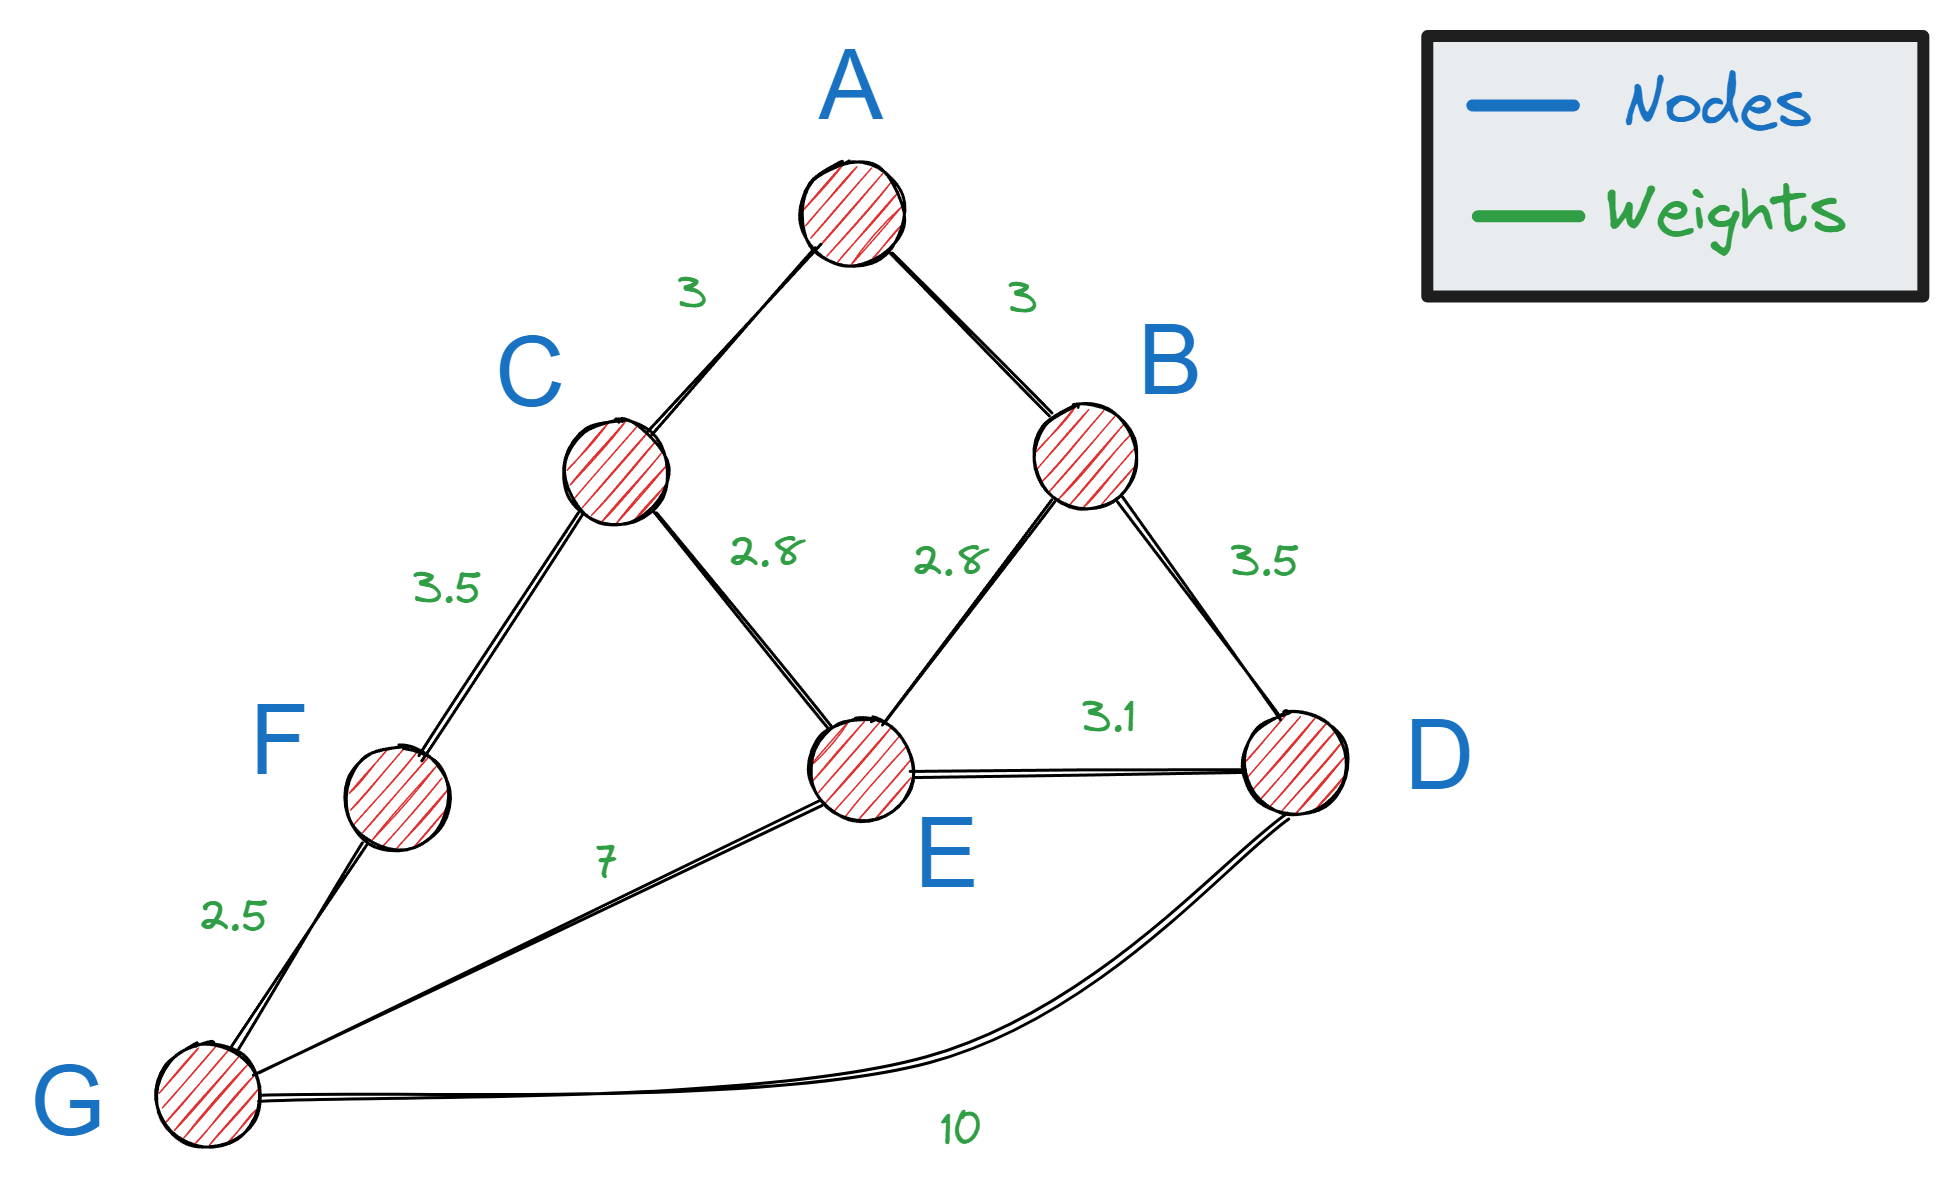

then, it would be represented by the following dictionary:

In [1]:
graph = {
    "A": {"B": 3, "C": 3},
    "B": {"A": 3, "D": 3.5, "E": 2.8},
    "C": {"A": 3, "E": 2.8, "F": 3.5},
    "D": {"B": 3.5, "E": 3.1, "G": 10},
    "E": {"B": 2.8, "C": 2.8, "D": 3.1, "G": 7},
    "F": {"G": 2.5, "C": 3.5},
    "G": {"F": 2.5, "E": 7, "D": 10},
}

Each key of the dictionary is a node and each value is a dictionary containing the neighbors of the key and distances to it. Our graph has seven nodes which means the dictionary must have seven keys. 

Other sources often refer to the above dictionary as __dictionary adjacency list__. We will stick to that term from now on as well.

### 1. Creating a `Graph` class

To make our code more modular and easier to follow, we will implement a simple `Graph` class to represent graphs. Under the hood, it will use a dictionary adjacency list. It will also have a method to easily add connections between two nodes:

In [5]:
class Graph:
    def __init__(self, graph: dict = {}):
        self.graph = graph  # A dictionary for the adjacency list

    def add_edge(self, node1, node2, weight):
        if node1 not in self.graph:  # Check if the node is already added
            self.graph[node1] = {}  # If not, create the node
        self.graph[node1][node2] = weight  # Else, add a connection to its neighbor

Using this class, we can construct our graph iteratively from scratch like this:

In [3]:
G = Graph()

# Add A and its neighbors
G.add_edge("A", "B", 3)
G.add_edge("A", "C", 3)

# Add B and its neighbors
G.add_edge("B", "A", 3)
G.add_edge("B", "D", 3.5)
G.add_edge("B", "E", 2.8)

...

Or we can pass a dictionary adjacency list directly, which is a faster method:

In [6]:
# Use the dictionary we defined earlier
G = Graph(graph=graph)

G.graph

{'A': {'B': 3, 'C': 3},
 'B': {'A': 3, 'D': 3.5, 'E': 2.8},
 'C': {'A': 3, 'E': 2.8, 'F': 3.5},
 'D': {'B': 3.5, 'E': 3.1, 'G': 10},
 'E': {'B': 2.8, 'C': 2.8, 'D': 3.1, 'G': 7},
 'F': {'G': 2.5, 'C': 3.5},
 'G': {'F': 2.5, 'E': 7, 'D': 10}}

### 2. Using a dictionary to store distances from source

We create another class method - this time for the algorithm itself:

In [17]:
class Graph:
    def __init__(self, graph: dict = {}):
        self.graph = graph

    # The add_edge method omitted

    def dijkstra(self, source: str):
        # Initialize the values of all nodes with infinity
        distances = {node: float("inf") for node in self.graph}
        distances[source] = 0  # Set the source value to 0

        ...

The first thing we do inside the method is to define a dictionary that contains node-value pairs. This dictionary gets updated every time we visit a node and its neighbors. Like we mentioned in the visual explanation of the algorithm, the initial values of all nodes are set to infinity while the source value is 0. 

When we finish implementing the algorithm, this dictionary will be returned and it will have the shortest distances to all nodes from source. We will be able to find the distance from B to F like this:

```python
# Future capability - find the shortest paths from B
distances = G.dijkstra("B")

to_F = distances["F"]
print(f"The shortest distance from B to F is {to_F}")
```

### 3. Using a priority queue to iterate over nodes

In [33]:
import heapq


class Graph:
    """
    Graph class representing a weighted graph with Dijkstra's algorithm implementation.
    """

    def __init__(self, graph: dict = {}):
        self.graph = graph

    def dijkstra(self, source):
        distances = {
            node: float("inf") for node in self.graph
        }  # Initialize distances to infinity
        distances[source] = 0  # Set source distance to 0
        visited = set()  # Initialize visited nodes set
        pq = [(0, source)]  # Initialize priority queue with source (distance, node)

        while pq:
            current_distance, current_node = heapq.heappop(
                pq
            )  # Get node with min distance
            if current_node in visited:
                continue  # Skip already visited nodes
            visited.add(current_node)

            for neighbor, weight in self.graph[current_node].items():
                tentative_distance = current_distance + weight
                if tentative_distance < distances[neighbor]:
                    distances[neighbor] = tentative_distance
                    heapq.heappush(pq, (tentative_distance, neighbor))

        # Optional: Use predecessors to reconstruct shortest paths
        predecessors = {node: None for node in self.graph}
        for node, distance in distances.items():
            for neighbor, weight in self.graph[node].items():
                if distances[neighbor] == distance + weight:
                    predecessors[neighbor] = node

        return distances, predecessors

In [35]:
G = Graph(graph)

d, p = G.dijkstra("B")

In [36]:
d["F"]

9.1

### 2. Understanding a priority queue

### 3. Creating a class to represent a graph

### 4. The Dijkastra algorithm as a `while` loop

### 5. Verifying the results with `networkx`

## Visualizing graphs using Matplotlib and NetworkX

## Animating the Dijkastra's algorithm

## Conclusion